In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install deepbrain


In [ ]:
import nibabel as nib
from deepbrain import Extractor
import matplotlib.pyplot as plt


In [ ]:
!pip install tensorflow==1.15.5

     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.8 MB 45.4 MB/s 
     |████████████████████████████████| 503 kB 64.8 MB/s 
     |████████████████████████████████| 2.9 MB 51.4 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ed306af73b775fae356cc1059d026b9018daf5fc184f2fcdb957e4cdf4edc289
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tens

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


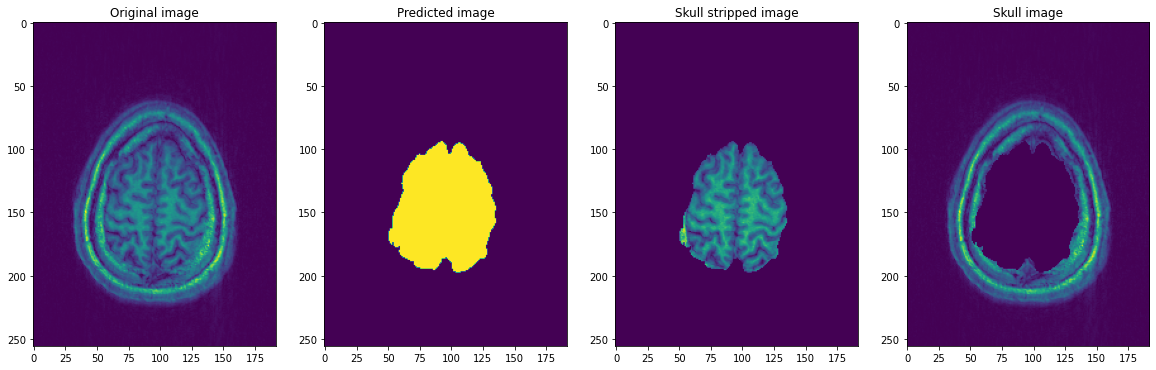

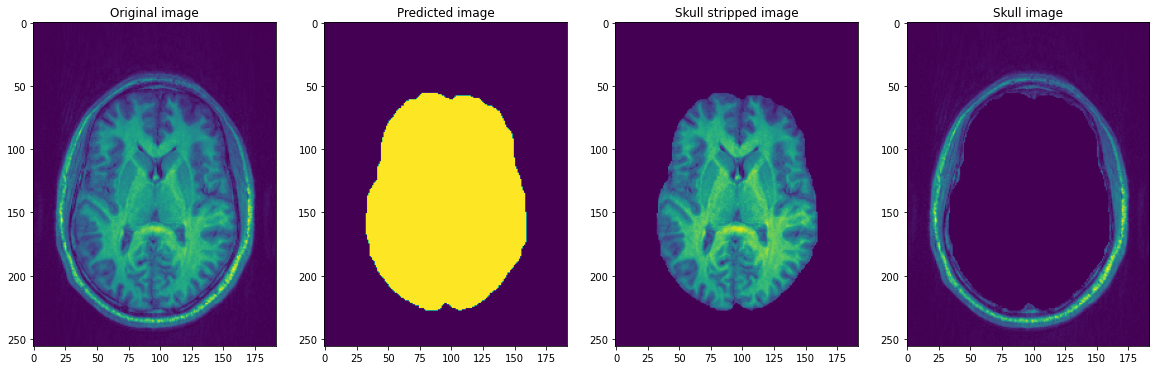

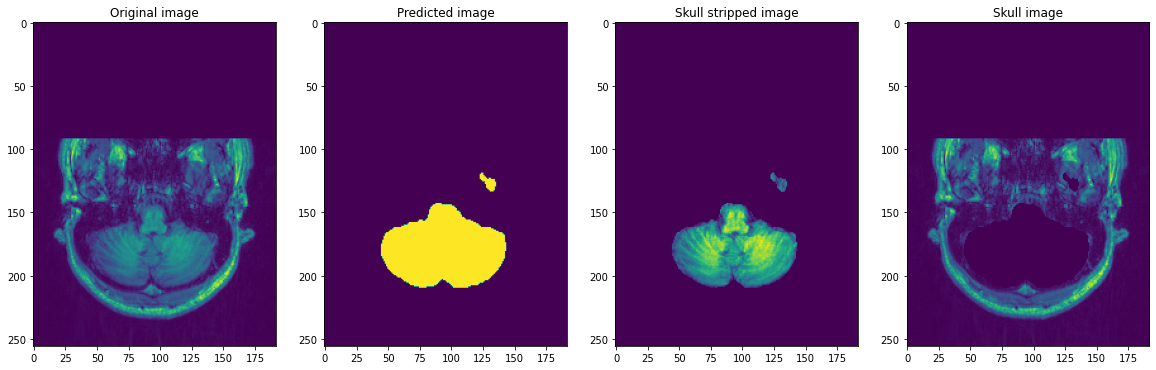

In [ ]:

# Load a nifti as 3d numpy image [H, W, D]
img = nib.load("/content/drive/MyDrive/MRIDataset/0.nii.gz").get_fdata()

ext = Extractor()

# `prob` will be a 3d numpy image containing probability 
# of being brain tissue for each of the voxels in `img`
prob = ext.run(img) 

img1x = img[:,51,:]

# mask can be obtained as:
mask = prob > 0.5

#ni_img = nib.Nifti1Image(prob, img.affine)

img2x = mask[:,51,:]

br_img = mask * img

img3x = br_img[:,51,:]

skull_img = img - br_img

img4x = skull_img[:,51,:]


fig,ax=plt.subplots(1,4,figsize=(20,10))
ax[0].set_title('Original image')
ax[0].imshow(img1x)
ax[1].set_title('Predicted image')
ax[1].imshow(img2x)
ax[2].set_title('Skull stripped image')
ax[2].imshow(img3x)
ax[3].set_title('Skull image')
ax[3].imshow(img4x)


img1y = img[:,100,:]
img2y = mask[:,100,:]
img3y = br_img[:,100,:]
img4y = skull_img[:,100,:]

fig1,ay=plt.subplots(1,4,figsize=(20,10))
ay[0].set_title('Original image')
ay[0].imshow(img1y)
ay[1].set_title('Predicted image')
ay[1].imshow(img2y)
ay[2].set_title('Skull stripped image')
ay[2].imshow(img3y)
ay[3].set_title('Skull image')
ay[3].imshow(img4y)


img1z = img[:,151,:]
img2z = mask[:,151,:]
img3z = br_img[:,151,:]
img4z = skull_img[:,151,:]

fig2,az=plt.subplots(1,4,figsize=(20,10))
az[0].set_title('Original image')
az[0].imshow(img1z)
az[1].set_title('Predicted image')
az[1].imshow(img2z)
az[2].set_title('Skull stripped image')
az[2].imshow(img3z)
az[3].set_title('Skull image')
az[3].imshow(img4z)